In [711]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [712]:
df = pd.read_csv('sales_data.csv')
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [713]:
# Get unique categories in the 'category' column
unique_categories = df['category'].unique()

# Get unique products in the 'product' column
unique_products = df['product'].unique()

# print the unique categories
print(unique_categories)
# print the unique products
print(unique_products)

['Electronics' 'Clothing' 'Accessories' 'Bags' 'Shoes' 'Clohting' 'Bgas'
 'Shoeses']
['Smartphone' 'Laptop' 'T-Shirt' 'Headphones' 'Watch' 'Tablet' 'Coat'
 'Smartwatch' 'Speaker' 'Backpack' 'Hoodie' 'Sneakers' 'Wallet' 'Jeans']


In [714]:
# Clean the data from misspelled information
df['category'] = df['category'].replace({'Clohting': 'Clothing', 'Bgas': 'Bags', 'Shoeses': 'Shoes'})

# get unique groups in the 'Color' column
unique_categories = df['category'].unique()

# print the unique categories
print(unique_categories)

['Electronics' 'Clothing' 'Accessories' 'Bags' 'Shoes']


#### Question 1. Total Revenue Generated By The Company Over The year

In [715]:
total_revenue = df["revenue"].sum()

# Print the total revenue
print(f"The total revenue generated by the company over the course of the year {total_revenue}")

The total revenue generated by the company over the course of the year 758330.0


#### Question 2. The Product With Highest Revenue

In [716]:
# get the index of the row with maximum revenue
max_index = df["revenue"].idxmax()

# get the record with maximum revenue
max_record = df.loc[max_index]

# print the record of the product corresponding to maximum revenue
print(max_record)
print('\n')
# Print the product with maximum revenue
print(f"The product that had the highest revenue was {max_record['product']} and generated a revenue of {max_record['revenue']}")

date         2022-01-12
product      Smartphone
category    Electronics
price             600.0
quantity           12.0
revenue          7200.0
Name: 13, dtype: object


The product that had the highest revenue was Smartphone and generated a revenue of 7200.0


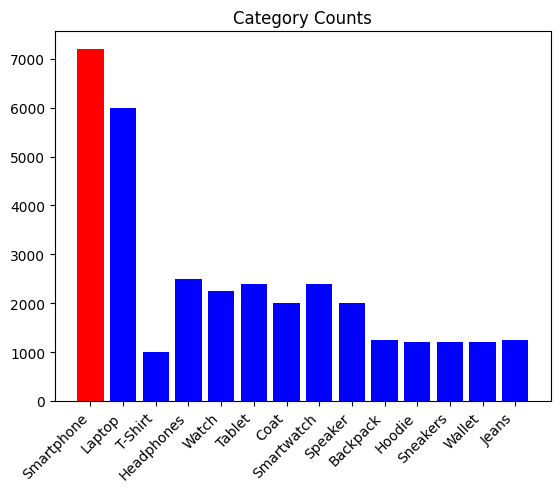

In [717]:
# Find the Product with the highest count
max_category = df.loc[df['revenue'].idxmax(), 'product']
# create a bar chart to visualize the counts for each category
plt.bar(df['product'], df['revenue'], color=['blue' if c != max_category else 'red' for c in df['product']])

# Add a title to the plot
plt.title('Category Counts')
# Extend the x-axis to avoid overlapping text
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

#### Question 3. Average Price Of Product Sold By The Company

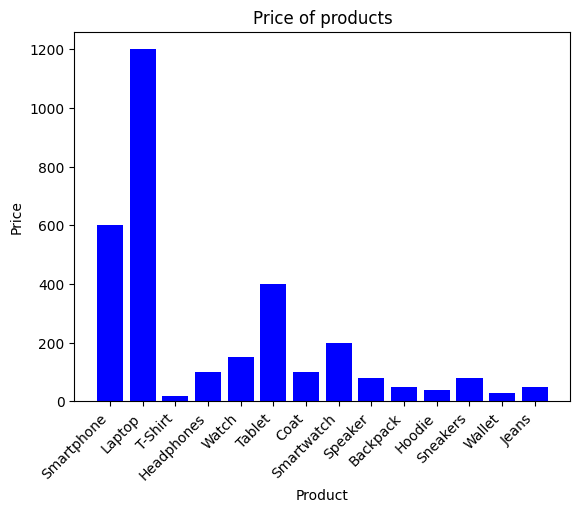

In [718]:
# Create a bar chart to visualize the revenue 
plt.bar(df['product'], df['price'], color='blue')
# Add labels and a title
plt.xlabel('Product')
plt.ylabel('Price')
# Extend the x-axis to avoid overlapping text
plt.xticks(rotation=45, ha='right')
plt.title('Price of products')
# Display the plot
plt.show()

In [719]:
# Get average price of products
average_price = df["price"].mean()

# Print the average price of a product
print(f"The average price of a product sold by the company {average_price}")

The average price of a product sold by the company 211.22615803814713


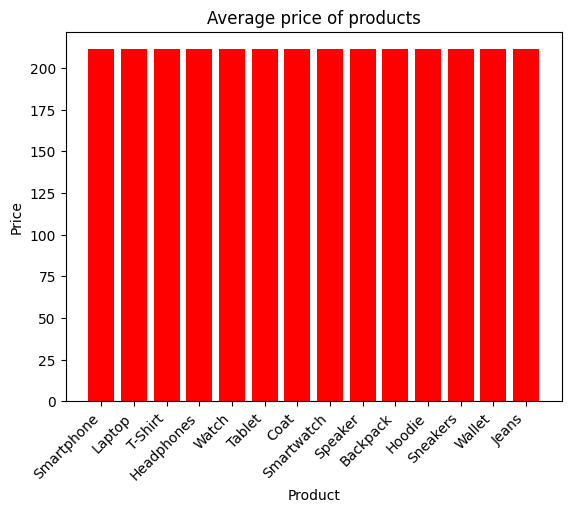

In [720]:
# Bar chart to visualize the average revenue per sale
plt.bar(df['product'], [average_price], color='red')
plt.xlabel('Product')
plt.ylabel('Price')
# Extend the x-axis to avoid overlapping text
plt.xticks(rotation=45, ha='right')
plt.title('Average price of products')
plt.show()

#### Question 4. Total Quantity of Products Sold By The Company

In [721]:
total_quantity = df["quantity"].sum()

# Print the average price of a product
print(f"The total quantity of products sold by the company {total_quantity}")

The total quantity of products sold by the company 5360.0


#### Question 5. Suppose that similar categories in each seperate record are not related

In [722]:
# get the index of the row with maximum revenue
max_index = df["revenue"].idxmax()
# get the record with maximum revenue
max_record = df.loc[max_index]

# print the record of the category corresponding to maximum revenue
print(max_record, '\n')
# Print the category with maximum revenue
print(f"The category that had the highest revenue was {max_record['category']} and generated a revenue of {max_record['revenue']}")

date         2022-01-12
product      Smartphone
category    Electronics
price             600.0
quantity           12.0
revenue          7200.0
Name: 13, dtype: object 

The category that had the highest revenue was Electronics and generated a revenue of 7200.0


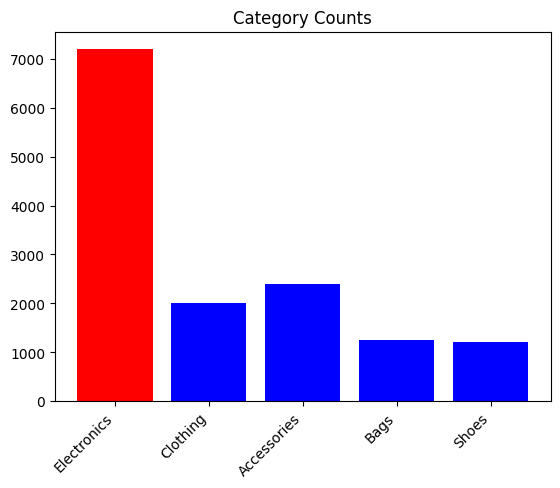

In [723]:
# Find the category with the highest count
max_category = df.loc[df['revenue'].idxmax(), 'category']
# Create bar chart to visualize the counts for each category
plt.bar(df['category'], df['revenue'], color=['blue' if c != max_category else 'red' for c in df['category']])

# Add a title to the plot
plt.title('Category Counts')
# Extend the x-axis to avoid overlapping text
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### Question 5. Suppose that the records with the same category are related so we sum their revenues

In [724]:
# Group the dataframe by category
grouped_df = df.groupby('category')

# Create new empty dataframe consisting of category and the total revenue for each category
new_df = pd.DataFrame(columns= ['category','revenue'])
# The index of current row/category
row_indx = 0

# Iterate through each group and map the total revenue to the corresponding category
for category, group in grouped_df:
    new_df.at[row_indx, 'revenue'] = group['revenue'].sum()
    new_df.at[row_indx, 'category'] = category
    row_indx+=1

# get the index of the row with maximum revenue
max_revenue = new_df['revenue'].max()
max_revenue_indx = new_df.index[new_df['revenue'] == max_revenue].tolist()
# get the record with maximum revenue
max_category = new_df.loc[max_revenue_indx[0]]


# Print the combined records of same category
print(new_df.head(10), '\n')
# Print the record of the category corresponding to maximum revenue
print(max_category, '\n')
# Print the category with maximum revenue
print(f"The category that had the highest revenue was {max_category['category']} and generated a revenue of {max_revenue}")

#type(new_df)

      category   revenue
0  Accessories  104700.0
1         Bags   20400.0
2     Clothing   95550.0
3  Electronics  516080.0
4        Shoes   21600.0 

category    Electronics
revenue        516080.0
Name: 3, dtype: object 

The category that had the highest revenue was Electronics and generated a revenue of 516080.0


##### Another Simpler form

In [736]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Group the dataframe by category and sum the revenues for each category
grouped_df = df.groupby('category')[numeric_cols]
grouped_df = grouped_df.sum()

# cast the NumPy array to a Pandas Series
grouped_df = pd.DataFrame(grouped_df)

# Get the index of row of maximum revenue
max_idx = grouped_df['revenue'].idxmax()
# Get the record with maximum revenue
max_record = grouped_df.loc[max_idx]

# Print Grouped Categories
print(grouped_df, '\n')
# Print the category with maximum revenue
print(f"The category that had the highest revenue was {max_idx} and generated a revenue of {max_record['revenue']}")

               price  quantity   revenue
category                                
Accessories  10680.0     962.0  104700.0
Bags          1200.0     408.0   20400.0
Clothing      6420.0    2281.0   95550.0
Electronics  57300.0    1439.0  516080.0
Shoes         1920.0     270.0   21600.0 

The category that had the highest revenue was Electronics and generated a revenue of 516080.0


##### Another way to get the max indx

In [ ]:
# Create new empty dataframe consisting of category and the total revenue for each category
new_df = pd.DataFrame(columns= [('category', str), ('revenue',int)])

# The index of current row/category
row_indx = 0

# Iterate through each group and map the total revenue to the corresponding category
for category, group in grouped_df:
    new_df.at[row_indx, 'revenue'] = group['revenue'].sum()
    new_df.at[row_indx, 'category'] = category
    row_indx+=1

# Get the index of row of maximum revenue
max_idx = new_df['revenue'].idxmax()
# Get the record with maximum revenue
max_record = new_df.loc[max_idx]

# Print the category with maximum revenue
print(f"The category that had the highest revenue was {max_record['category']} and generated a revenue of {max_record['revenue']}")


The category that had the highest revenue was Electronics and generated a revenue of 516080.0


C:\Users\saraa\AppData\Local\Temp\ipykernel_17080\3761831378.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = new_df.groupby('category').sum().reset_index()


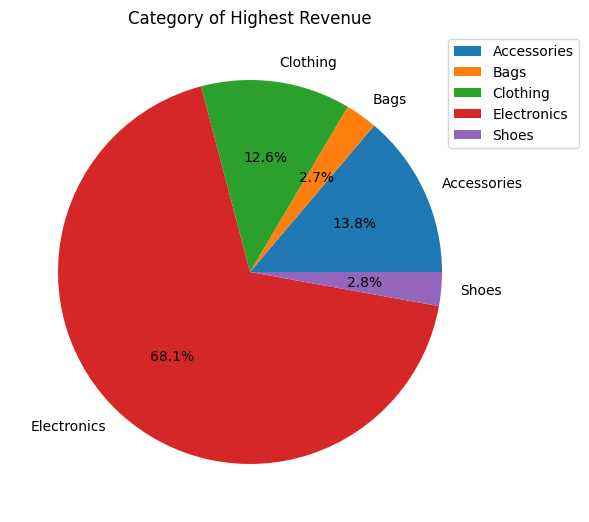

In [ ]:
# set a threshold for small categories
threshold = 2000

# Group small categories into an "Other" category
new_df.loc[new_df['revenue'] < threshold, 'category'] = 'Other'
new_df = new_df.groupby('category').sum().reset_index()
# create a pie chart to visualize the counts for each category
plt.pie(new_df['revenue'], labels=new_df['category'], autopct='%1.1f%%')

# adjust the position of the legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Category of Highest Revenue')

# remove the text around the figure
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
# Show the plot
plt.show()

#### Question 6. Average Revenue Per sale

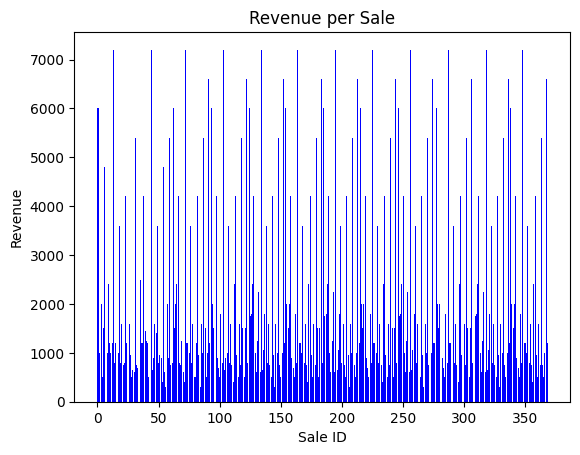

In [ ]:
# Get average revenue per sale
average_revenue_per_sale = df['revenue'].mean()

# Create a bar chart to visualize the revenue 
plt.bar(df.index, df['revenue'], color='blue')
# Add labels and a title
plt.xlabel('Sale ID')
plt.ylabel('Revenue')
plt.title('Revenue per Sale')
# Display the plot
plt.show()

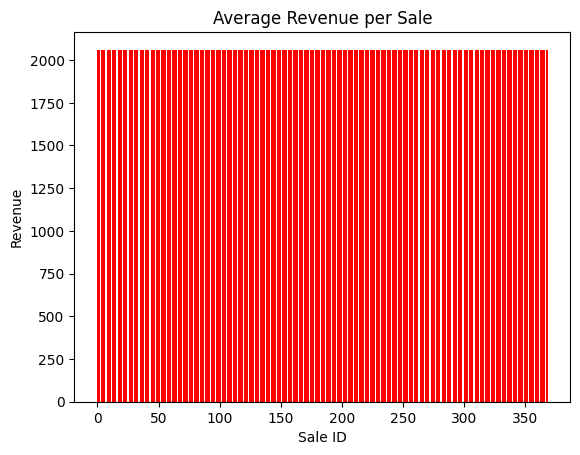

The average revenue per sale is 2060.679347826087


In [ ]:
# Bar chart to visualize the average revenue per sale
plt.bar(df.index, [average_revenue_per_sale], color='red')
plt.xlabel('Sale ID')
plt.ylabel('Revenue')
plt.title('Average Revenue per Sale')
plt.show()

# Print the average revenue per sale
print(f"The average revenue per sale is {average_revenue_per_sale}")

#### Question 7. The Total Revenue Generated In Each Quarter Of The Year

In [ ]:
# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'])
# Group the data by quarter 
quarterly_revenue = df.groupby(pd.Grouper(key='date', freq='Q'))
# Sum the revenue for each group
quarterly_revenue = quarterly_revenue.sum()

# Display the total revenue for each quarter
print(quarterly_revenue)

              price  quantity   revenue
date                                   
2022-03-31  19910.0    1322.0  182100.0
2022-06-30  18770.0    1307.0  183970.0
2022-09-30  19420.0    1335.0  197680.0
2022-12-31  19420.0    1396.0  194580.0


C:\Users\saraa\AppData\Local\Temp\ipykernel_17080\2577122461.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_revenue = quarterly_revenue.sum()
